# FOR GOOGLE COLAB

# Download the repo


In [ ]:
!pip install tensorflow-gpu==2.0.0

In [3]:
!git clone https://github.com/krishshah99615/Single-Hand-Gesture

Cloning into 'Single-Hand-Gesture'...
remote: Enumerating objects: 256, done.
remote: Counting objects: 100% (256/256), done.
remote: Compressing objects: 100% (235/235), done.
remote: Total 256 (delta 22), reused 244 (delta 13), pack-reused 0
Receiving objects: 100% (256/256), 2.58 MiB | 5.12 MiB/s, done.
Resolving deltas: 100% (22/22), done.


# Load all Library and funtions

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense,Input,GlobalAveragePooling2D
import numpy as np
import os

In [5]:
DATA_DIR="Single-Hand-Gesture/Dataset/"
TARGET_SIZE=(224,224)
BATCH_SIZE=32
VALIDATION_SPLIT=0.3
EPOCHS=100
NUM_CLASSES=3

In [6]:
train_data_gen = ImageDataGenerator(validation_split=VALIDATION_SPLIT,
                                    rescale=1./255)

train_gen = train_data_gen.flow_from_directory(DATA_DIR,
                                               target_size=TARGET_SIZE,
                                               class_mode='categorical',
                                               shuffle=True,
                                              subset='training')

val_gen = train_data_gen.flow_from_directory(DATA_DIR,
                                               target_size=TARGET_SIZE,
                                               class_mode='categorical',
                                                subset='validation')

Found 112 images belonging to 3 classes.
Found 46 images belonging to 3 classes.


In [ ]:
vgg16_model =VGG16(weights = 'imagenet', include_top = False)
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(NUM_CLASSES, activation = 'softmax')(x)
model = Model(inputs = vgg16_model.input, outputs = predictions)
for layer in vgg16_model.layers:
    layer.trainable = False
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.summary()

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
#Early Stopping
early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto')
#CReating a log file of training
csv= tf.keras.callbacks.CSVLogger('logfile.csv')
#Terminate if Nan Occurs
term_nan=tf.keras.callbacks.TerminateOnNaN() 
#Learning Rate Sceduler
    
history = model.fit_generator(train_gen,epochs=EPOCHS,validation_data=val_gen,shuffle=True,callbacks=[early,checkpoint,csv,term_nan])

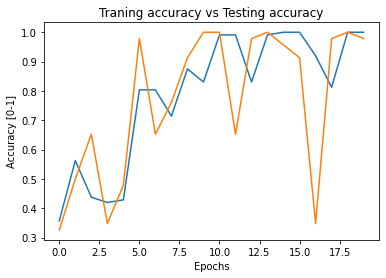

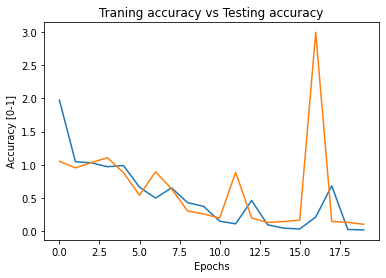

In [17]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Traning accuracy vs Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy [0-1]')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Traning accuracy vs Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy [0-1]')
plt.show()
model.load_weights('model.h5')
model.save('model.h5')

In [19]:
train_gen.class_indices

{'Shikhara': 0, 'Simhamukha': 1, 'Trishula': 2}